<a href="https://colab.research.google.com/github/msmsm104/MachineLearning_Project/blob/main/Definition/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')


In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/TIL(Today I Learned)/20220607/ML-project/data/'

## Memory Reducing

In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
data = reduce_mem_usage(pd.read_csv(base_path + 'train_V2.csv'))

Memory usage of dataframe is 983.90 MB
Memory usage after optimization is: 288.39 MB
Decreased by 70.7%


## Columns

    Id - 플레이어의 Id
    groupId - 경기 내의 그룹을 식별하는 ID. 현재 그룹의 선수들이 서로 다른 경기에서 경기한다면, 그들은 매번 다른 groupId를 갖게 될 것이다.
    matchId - 경기를 식별하기 위한 ID. train set과 test set에 모두 있는 시합은 없다.
    matchDuration - 경기 시간.
    matchType - 경기 종류(duo, quad ...).
    assists - 팀 동료들과 같이 죽인 적 수이다.
    boosts - 부스트 아이템 사용한 수.
    damageDealt - 가한 데미지 총량. Note: 자신에게 가한 데미지는 제외.
    DBNOs - 빈사상태로 만든 적의 수.
    headshotKills - 헤드샷 으로 처리한 적의 수.
    heals - 치료 아이템 사용 수.
    killPlace - 경기에서 처치한 적의 수 랭킹.
    killPoints - 플레이어의 처치 기반 외부 랭킹 (Elo 방식의 순위). rankPoints에서 -1이 아닌 값이 있는 경우, killPoints에서 0은 "없음"으로 처리되어야 한다.
    kills - 처치한 적의 수.
    killStreaks - 단기간에 가장 많이 처치한 적의 최대치.
    longestKill - 플레이어가 적을 죽인 가장 긴 거리. 선수를 다운시키고 멀리 운전하는 것이 가장 긴 처치로 이어질 수 있기 때문에 오해의 소지가 있을 수 있다.
    maxPlace - 경기에서 가장 순위가 낮은 것에 대한 데이터. 이것은 순위를 건너뛸 수도 있기 때문에 numGroups와 일치하지 않을 수 있다.
    numGroups - 경기에 있는 팀의 수.
    rankPoints - Elo 방식의 플레이어 랭킹. 다음 버전의 API에서는 삭제될 예정이기 때문에 사용에 주의. '-1' 값은 순위가 "None" 이다.
    revives - 플레이어가 팀원 회복 시킨 수.
    rideDistance - 차량으로 이동한 거리(단위 : 미터).
    roadKills - 차량으로 죽인 플레이어 수.
    swimDistance - 수영한 거리(단위 : 미터).
    teamKills - 팀킬한 횟수.
    vehicleDestroys - 차량을 폭파시킨 횟수.
    walkDistance - 걸은 총 거리(단위 : 미터).
    weaponsAcquired - 무기 얻은 갯수.
    winPoints - 플레이어의 승리 기반 외부 랭킹 (Elo 방식의 순위). rankPoints에서 -1이 아닌 값이 있는 경우, winPoints에서 0은 "없음"으로 처리되어야 한다.
    winPlacePerc - 예측 목표. 순위의 퍼센트로 표시되며, 1이면 경기에서 1등이고 0이면 경기에서 꼴지 했다는 것이다. 이것은 numGroups로 계산되는게 아니라, maxPlace로 계산되기 때문에 누락되는 것이 있을수도다.



## EDA

    - rankPoints
    - killPoints
    - winPoints
    - numGroups
    - maxPlace
    - winPlacePerc

In [ ]:
data[['rankPoints','killPoints', 'winPoints', 'numGroups', 'maxPlace', 'winPlacePerc']].corr().style.background_gradient(cmap='summer_r')

,rankPoints,killPoints,winPoints,numGroups,maxPlace,winPlacePerc
rankPoints,1.000000,-0.975555,-0.993845,0.046996,0.048712,0.013522
killPoints,-0.975555,1.000000,0.983417,-0.042366,-0.044802,0.012909
winPoints,-0.993845,0.983417,1.000000,-0.027483,-0.029295,0.007062
numGroups,0.046996,-0.042366,-0.027483,1.000000,0.997900,0.039625
maxPlace,0.048712,-0.044802,-0.029295,0.997900,1.000000,0.037381
winPlacePerc,0.013522,0.012909,0.007062,0.039625,0.037381,1.000000


 - correlation을 관측한 결과 
    - winPoints : killPoints (유사도 아주 높음)
    - numGroups : maxPlace (유사도 아주 높음)
    - rankPoints - (winPoints, killPoints) (음의 유사도 아주 높음 : 반대성향)

 =>만약 모델링에 쓰이기 적절한 column들이라면 winPoints 와 killPoints중 하나, numGroups와 maxPlace중 하나의 column만 골라서 사용한다.

## column별 데이터 분포 확인

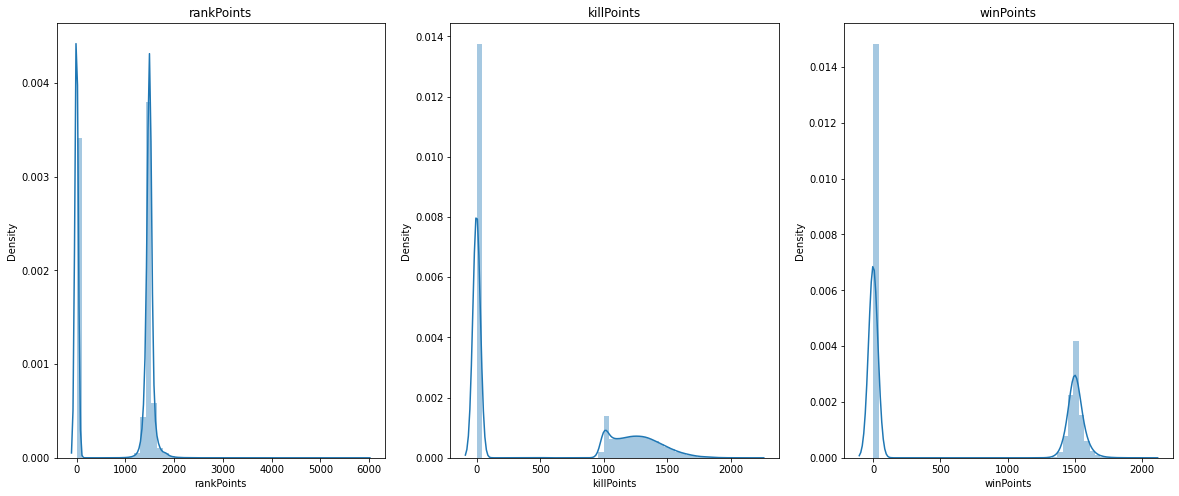

In [ ]:
f, ax = plt.subplots(1,3,figsize=(20, 8))

sns.distplot(data['rankPoints'], ax=ax[0])
ax[0].set_title('rankPoints')

sns.distplot(data['killPoints'], ax=ax[1])
ax[1].set_title('killPoints')

sns.distplot(data['winPoints'], ax=ax[2])
ax[2].set_title('winPoints')

plt.show()

'killPoints'와 'winPoints' column의 경우 대부분의 값이 0인것을 확인 할 수 있다.

column별 0의 비율

In [ ]:
print(f"0 percentage of rankPoints: {len(data[data['rankPoints'] == 0]) / len(data) * 100:.2f}")
print(f"0 percentage of killPoints: {len(data[data['killPoints'] == 0]) / len(data) * 100:.2f}")
print(f"0 percentage of winPoints: {len(data[data['winPoints'] == 0]) / len(data) * 100:.2f}")

0 percentage of rankPoints: 2.01
0 percentage of killPoints: 59.72
0 percentage of winPoints: 59.72


    killPoints - 플레이어의 처치 기반 외부 랭킹 (Elo 방식의 순위). rankPoints에서 -1이 아닌 값이 있는 경우, killPoints에서 0은 "없음"으로 처리되어야 한다.
    rankPoints - Elo 방식의 플레이어 랭킹. 다음 버전의 API에서는 삭제될 예정이기 때문에 사용에 주의. '-1' 값은 순위가 "None" 이다.
    winPoints - 플레이어의 승리 기반 외부 랭킹 (Elo 방식의 순위). rankPoints에서 -1이 아닌 값이 있는 경우, winPoints에서 0은 "없음"으로 처리되어야 한다.

### 결측치

    => column설명만 살펴보더라도 rankPoints와 killPoints, winPoints가 상관관계가 있음을 추측할 수 있다.
    => rankPoints가 -1인 경우 (순위 없음), rankPoints가 -1이 아닌경우 (순위 있음)
    => 순위 있음 & killPoints가 0 인경우 killPoints는 결측값
    => 순위 있음 & winPoints가 0인경우 winPoints는 결측값

    ##결측값의 비율을 알아보자
    \ 결측값(winPoints, killPoints 동일)이 2655647개(약 60%) 임을 알 수 있다.
    => target column과의 상관관계도 낮고 + 결측값의 비율이 너무 높기 때문에 해당 column들을 학습에서 제외 시키기로 결정!

In [ ]:
print(f"winPoints column NaN percentage : {len(data[(data['rankPoints'] != -1) & (data['winPoints'] == 0)]) / len(data) * 100:.2f}%")
print(f"killPoints column NaN percentage : {len(data[(data['rankPoints'] != -1) & (data['killPoints'] == 0)]) / len(data) * 100:.2f}%")

winPoints column NaN percentage : 59.72%
killPoints column NaN percentage : 59.72%


----

    maxPlace - 경기에서 가장 순위가 낮은 것에 대한 데이터. 이것은 순위를 건너뛸 수도 있기 때문에 numGroups와 일치하지 않을 수 있다.
    numGroups - 경기에 있는 팀의 수.

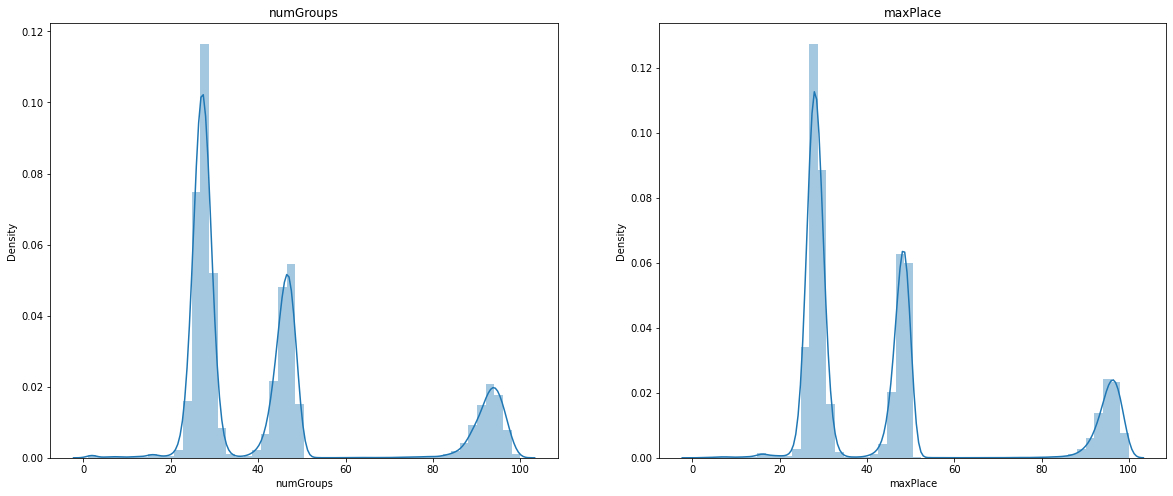

In [ ]:
f, ax = plt.subplots(1,2,figsize=(20, 8))

sns.distplot(data['numGroups'], ax=ax[0])
ax[0].set_title('numGroups')

sns.distplot(data['maxPlace'], ax=ax[1])
ax[1].set_title('maxPlace')


plt.show()

 - 위에서 관측한 대로 두 속성의 분포역시 거의 흡사한 모습을 보인다. 다중공선성문제를 미연에 방지 하기 위해 두 컬럼 중 하나의 column만 사용하여 modeling을 진행하도록 한다.
 - 또 한, 세가지 범위에 데이터가 모여 있음을 알 수 있다.
    => 해당 column을 categorical value로 변환시켜 보도록하자.

In [ ]:
## 3구간으로 나눠서 categorical value로 표현, 상관관계에 변화가 있는지 파악해보자.
## < 40, 40 < 80, 80 <

data['cat_numGroups'] = 0

data.loc[data['numGroups'] < 40, 'cat_numGroups'] = 0
data.loc[(data['numGroups'] > 40) & (data['numGroups'] < 80), 'cat_numGroups'] = 1
data.loc[data['numGroups'] > 80, 'cat_numGroups'] = 2

In [ ]:
data[['cat_numGroups', 'winPlacePerc']].corr().style.background_gradient(cmap='summer_r')

,cat_numGroups,winPlacePerc
cat_numGroups,1.000000,0.041337
winPlacePerc,0.041337,1.000000


In [ ]:
data.groupby('cat_numGroups')['winPlacePerc'].mean()

## cat_numGroups가 증가하며 winPlacePerc도 증가하는 경향이 명확히 관측함을 알 수 잇다.

cat_numGroups
0    0.460938
1    0.485107
2    0.491455
Name: winPlacePerc, dtype: float16

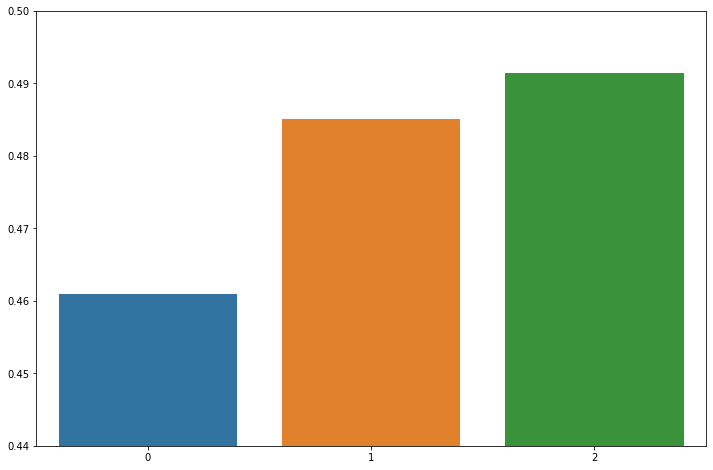

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(x=[0,1,2], y=data.groupby('cat_numGroups')['winPlacePerc'].mean().values)

ax.set_ylim(0.44, 0.5)



plt.show()

---